In [1]:
import sys
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTContainer, LTTextBox
from pdfminer.pdfinterp import PDFPageInterpreter, PDFResourceManager
from pdfminer.pdfpage import PDFPage

def find_textboxes_recursively(layout_obj):
    """
    재귀적으로 텍스트 박스(LTTextBox)를 찾고
    텍스트 박스들을 리스트로 반환합니다.
    """
    # LTTextBox를 상속받은 객체의 경우 리스트에 곧바로 넣어서 반환합니다.
    if isinstance(layout_obj, LTTextBox):
        return [layout_obj]
    # LTContainer를 상속받은 객체의 경우 자식 요소를 포함하고 있다는 의미이므로
    # 재귀적으로 자식 요소를 계속 찾습니다.
    if isinstance(layout_obj, LTContainer):
        boxes = []
        for child in layout_obj:
            boxes.extend(find_textboxes_recursively(child))
        return boxes
    # 아무것도 없다면 빈 리스트를 반환합니다.
    return []

# 공유 리소스를 관리하는 리소스 매니저를 생성합니다.
laparams = LAParams()
resource_manager = PDFResourceManager()

# 페이지를 모으는 PageAggregator 객체를 생성합니다.
device = PDFPageAggregator(resource_manager, laparams=laparams)

# Interpreter 객체를 생성합니다.
interpreter = PDFPageInterpreter(resource_manager, device)

# 파일을 바이너리 형식으로 읽어 들입니다.
with open("[우리은행]Daily Forex Live_2020.7.9.pdf", 'rb') as f:
    # PDFPage.get_pages()로 파일 객체를 지정합니다.
    # PDFPage 객체를 차례대로 추출합니다.
    # 키워드 매개변수인 pagenos로 처리할 페이지 번호(0-index)를 리스트 형식으로 지정할 수도 있습니다.
    for page in PDFPage.get_pages(f):
        # 페이지를 처리합니다.
        interpreter.process_page(page)
        # LTPage 객체를 추출합니다.
        layout = device.get_result()
        # 페이지 내부의 텍스트 박스를 리스트로 추출합니다.
        boxes = find_textboxes_recursively(layout)
        # 텍스트 박스를 왼쪽 위의 좌표부터 차례대로 정렬합니다.
        # y1(Y 좌표)는 위에 있을수록 크므로 음수로 변환하게 해서 비교했습니다.
        boxes.sort(key=lambda b: (-b.y1, b.x0))
        for box in boxes:
            # 읽기 쉽게 선을 출력합니다.
            print('-' * 10)
            # 텍스트 박스의 내용을 출력합니다.
            print(box.get_text().strip())

----------

----------
Daily Forex Live
----------
2020.7.9(목)
----------

----------

----------
언택트  테마  랠리  재개  속 
1,180원  후반  지지선  테스트
----------
FX/Economist  민경원 
02)2002-4152 
eco_min1230@wooribank.com
----------

----------
금일  달러/원  예상: 1,190 ~ 1,195원 
NDF  종가: 1,192.40(스왑포인트  -0.20  고려  시  1,192.60원  전일비  -2.90) 
시장평균환율(MAR): 1,195.80원
----------
고가
----------
NDF  최종호가
----------
저가
----------
1,192.20/1,192.60
----------
1,194.10
----------
1,194.10
----------

----------

----------

----------

----------
금일  전망:  기술주  중심의  위험자산  랠리  재개,  하락압력  우위  예상
----------
오늘  외환시장  주요  이벤트
----------

----------
상승요인: 1,180원  후반  지지선  인식,  결제를  비롯한  저가매수  우위  지속
----------
08:50  일본  5월  핵심기계수주 YoY(예상 -16.8%, 이전 -17.7%) 
10:30  중국  6월  CPI YoY(예상  2.5%,  이전  2.4%) 
15:00  독일  5월  수출  MoM(예상  14.0%,  이전  -24.0%) 
21:30  미국  주간  신규실업수당청구(예상 1,375k, 이전 1,427k) 
23:00  미국  5월  도매재고  MoM(F)(예상  -1.2%,  이전  -1.2%) 
01:00  미국  라파엘  보스틱  애틀란타  연은  총재  연설
----------
하락요인:  위험선호  재개,  중국  주가

----------
Daily Forex Live
----------
4
----------

----------

----------
Compliance Notice
----------
본 자료에 기재된 내용들은 작성자 본인의 의견을 정확하게 반영하고 있으며 외부의 부당한 압력이나 간섭 없이 작성되었음을 확인합니다(작성자: 민경원).
----------
본 자료는 고객의 투자를 돕기 위한 목적으로 작성되었습니다. 본 자료에 수록된 내용은 당행이 신뢰할 만한 자료 및 정보를 바탕으로 작성한 것이나, 당행이 그 정확성이나 완전성을 보장할
----------
수 없으므로 참고 자료로만 활용하시기 바라며 투자 시 투자자 자신의 판단과 책임하에 최종 결정을 하시길 바랍니다. 따라서 본 자료는 어떠한 경우에도 고객의 투자 결과에 대한 법적 책임
----------
소재의 증빙자료로 사용될 수 없으며 직간접적 손실이 발생해도 당행은 책임을 지지 않습니다.
----------
본  자료는  자본시장법  상  조사분석자료가  아니며  조사분석의  독립성을  확보하기  위한  법적  제한을  받지  않습니다.  또한  법령  상  허용되는  범위  내에서  당행이  본  자료에  언급된  통화  및
----------
관련 금융상품  등을 거래하거나 관련  금융서비스를 제공할 수 있으며 이와 관련해  당행이  이해관계를 가질 수 있습니다.
----------
본  자료에  기재된  의견은  예측에  불과하며  별도  통지  없이  변경될  수  있고  일정한  주기로  업데이트  되지  않을  수  있습니다.
----------
본  자료는  어떠한  경우에도  당행의  사전동의  없이  복사,  인용,  배포,  전송,  대여  및  변경될  수  없습니다.
----------



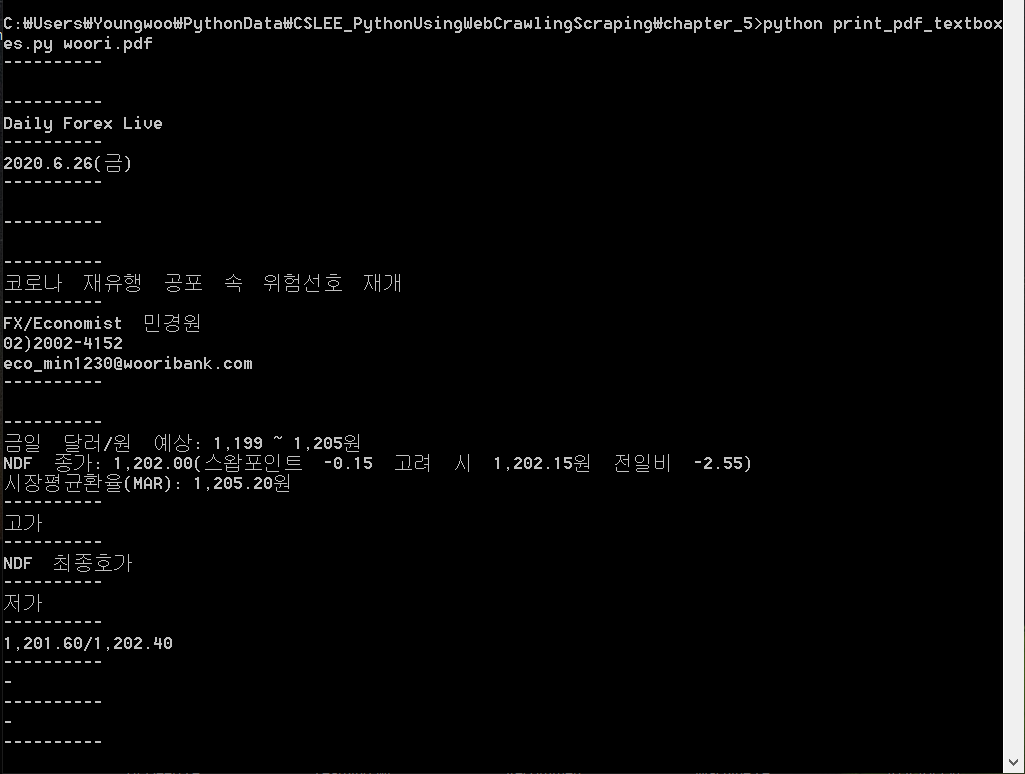